# Loan Status Prediction

In [1]:
import pandas as pd

train_df = pd.read_csv('unbalanced_dataset.csv')
train_df.info()

ModuleNotFoundError: No module named 'pandas'

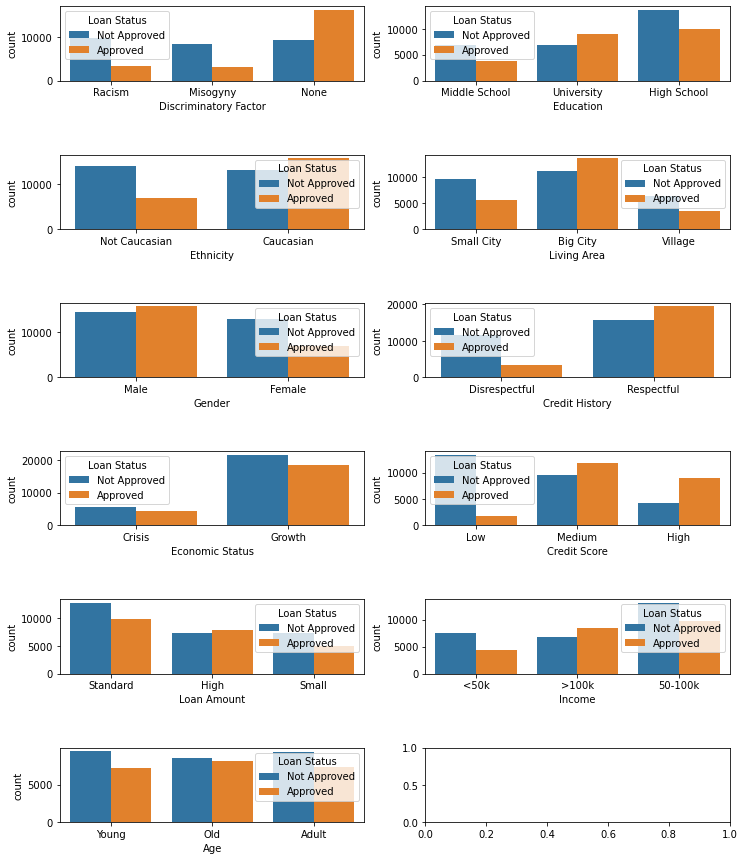

In [ ]:
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Discriminatory Factor','Education','Ethnicity','Living Area','Gender','Credit History','Economic Status','Credit Score','Loan Amount','Income','Age']
fig,axes = plt.subplots(6,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [ ]:
train_df

,Credit History,Discriminatory Factor,Gender,Ethnicity,Credit Score,Education,Economic Status,Loan Amount,Income,Age,Living Area,Loan Status
0,Disrespectful,Racism,Male,Not Caucasian,Low,Middle School,Crisis,Standard,<50k,Young,Small City,Not Approved
1,Respectful,Misogyny,Female,Caucasian,Medium,University,Growth,High,>100k,Old,Big City,Approved
2,Respectful,Misogyny,Female,Caucasian,Medium,High School,Growth,Small,50-100k,Adult,Village,Not Approved
3,Respectful,Misogyny,Female,Caucasian,Medium,High School,Growth,Small,<50k,Old,Small City,Approved
4,Disrespectful,None,Male,Caucasian,Low,University,Growth,Standard,50-100k,Old,Big City,Not Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Respectful,Racism,Male,Not Caucasian,Low,High School,Growth,Small,50-100k,Young,Small City,Not Approved
49996,Respectful,None,Male,Caucasian,High,University,Crisis,Standard,>100k,Old,Big City,Approved
49997,Disrespectful,None,Male,Not Caucasian,Low,High School,Growth,Small,<50k,Adult,Village,Not Approved
49998,Respectful,None,Female,Caucasian,Medium,High School,Growth,Standard,50-100k,Young,Big City,Approved


In [ ]:
train_df = train_df.drop(columns = ['Education','Age','Living Area','Income'])

In [ ]:
train_df['Loan Status'].value_counts()

Not Approved    27305
Approved        22695
Name: Loan Status, dtype: int64

In [ ]:
train_df['Credit Score'].value_counts()

Medium    21341
Low       15282
High      13377
Name: Credit Score, dtype: int64

In [ ]:
train_df['Gender'].value_counts()

Male      30150
Female    19850
Name: Gender, dtype: int64

In [ ]:
train_df.loc[[0]]

,Credit History,Discriminatory Factor,Gender,Ethnicity,Credit Score,Economic Status,Loan Amount,Loan Status
0,Disrespectful,Racism,Male,Not Caucasian,Low,Crisis,Standard,Not Approved


In [ ]:
# train_df_encoded.loc[[0]]

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf_nb = CategoricalNB()

In [ ]:
# Transforming categorical attributes using dummies
# 0 is no 1 is yes
# 0 in y_test means approved
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

In [ ]:
# Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan Status_Not Approved')
y = train_df_encoded['Loan Status_Not Approved']

# Splitting into Train -Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [ ]:
clf_nb.fit(X_train,y_train)
y_pred_nb = clf_nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_nb))

print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion matrix
[[3257 1282]
 [1097 4364]]
Accuracy: 0.7621


## Decision Tree

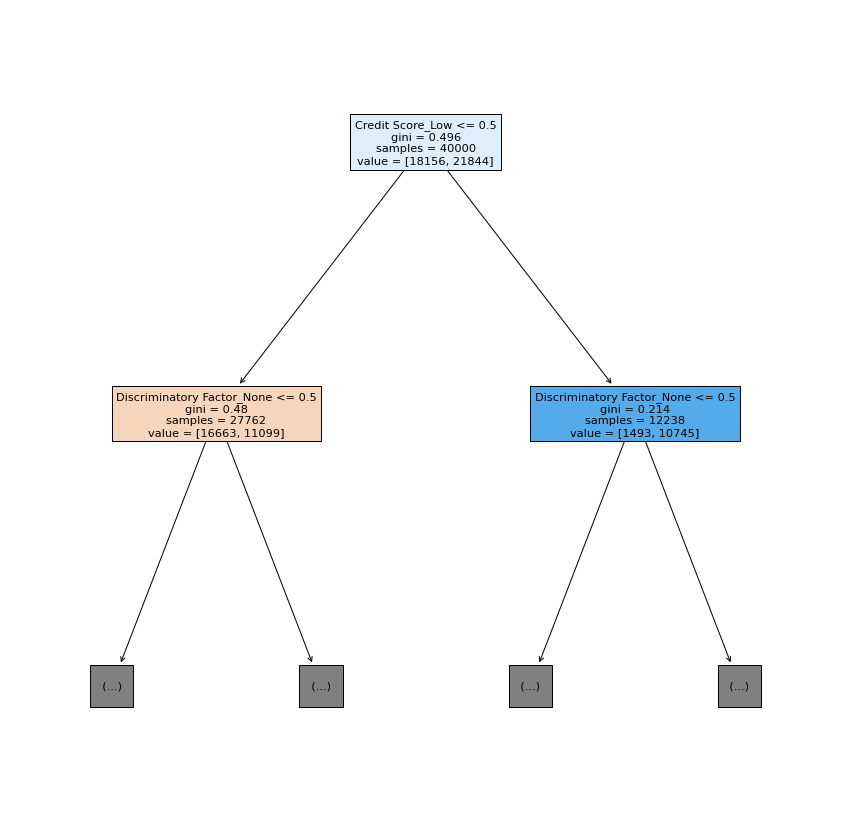

In [ ]:
# BUILDING AND VISUALIZING THE TREE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf_dt = DecisionTreeClassifier(min_samples_split=20, random_state=42, max_depth= 5)
clf_dt.fit(X_train, y_train)

features = list(X_train.columns[:19])
plt.figure(figsize=(15,15))
graph = tree.plot_tree(clf_dt,feature_names=features, filled=True, max_depth = 1, )
plt.show(graph)

# ORANGE IS NO BLUE IS YES


In [ ]:
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Confusion matrix
[[3072 1467]
 [ 655 4806]]
Accuracy: 0.7878


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Confusion matrix
[[3109 1430]
 [ 693 4768]]
Accuracy: 0.7877


In [ ]:
# The estimated coefficients will all be around 1:
coeff = clf_lr.coef_.reshape(10)

In [ ]:
i = 0
for x in X_train.columns:
    print(x,coeff[i])
    i+=1


Credit History_Respectful -0.04427608704847267
Discriminatory Factor_None -2.053343226351352
Discriminatory Factor_Racism 0.052491579105833276
Gender_Male 0.04042966488460891
Ethnicity_Not Caucasian -0.032022741920870706
Credit Score_Low 3.1971955031039543
Credit Score_Medium 0.6483274933535111
Economic Status_Growth -0.2580515681423744
Loan Amount_Small -0.8988897485857855
Loan Amount_Standard -0.2982409333506941


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(n_estimators= 500, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf = clf_rf.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion matrix
[[3082 1457]
 [ 670 4791]]
Accuracy: 0.7873


In [ ]:
X_test

,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard
2317,1,1,0,1,0,0,1,1,0,0
43322,1,1,0,1,0,0,1,1,0,1
16221,0,0,0,0,0,1,0,1,0,0
8858,0,1,0,1,1,0,1,1,0,1
6127,1,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
12284,0,0,1,1,1,1,0,1,0,1
8461,1,1,0,1,0,0,0,1,0,1
26275,1,1,0,0,0,0,1,1,0,0
24714,0,1,0,1,0,1,0,1,0,1


In [ ]:
y_test

2317     0
43322    0
16221    1
8858     0
6127     0
        ..
12284    1
8461     0
26275    0
24714    1
20104    0
Name: Loan Status_Not Approved, Length: 10000, dtype: uint8

In [ ]:
print(int(clf_lr.predict(X_test.loc[[2317]])))
train_df_encoded.loc[[2317]]

0


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
2317,1,1,0,1,0,0,1,1,0,0,0


In [ ]:
def show_pred(i):
    print("Prediction: ", int(clf_lr.predict(X_test.loc[[i]])))
    return train_df_encoded.loc[[i]]

In [ ]:
index = X_test.index

In [ ]:
index

Int64Index([ 2317, 43322, 16221,  8858,  6127,  2492, 46922, 23696, 45650,
            48541,
            ...
            49807, 41289, 22338, 28042, 29358, 12284,  8461, 26275, 24714,
            20104],
           dtype='int64', length=10000)

In [ ]:
show_pred(2317)

Prediction:  0


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
2317,1,1,0,1,0,0,1,1,0,0,0


In [ ]:
show_pred(41289)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
41289,0,0,1,1,1,1,0,1,1,0,1


In [ ]:
show_pred(24714)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
24714,0,1,0,1,0,1,0,1,0,1,1


In [ ]:
show_pred(20104)

Prediction:  0


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
20104,1,1,0,1,0,0,1,1,0,1,0


In [ ]:
show_pred(8461)

Prediction:  0


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
8461,1,1,0,1,0,0,0,1,0,1,0


WRONG PREDICTIONS

In [ ]:
show_pred(6127)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
6127,1,0,1,1,1,0,0,1,0,1,0


In [ ]:
show_pred(7979)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
7979,1,0,0,0,1,0,1,1,1,0,0


In [ ]:
show_pred(15611)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
15611,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
show_pred(45321)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
45321,1,0,1,1,1,0,1,1,0,1,0


In [ ]:
show_pred(2911)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
2911,1,0,1,1,1,0,1,1,1,0,0


In [ ]:
show_pred(44051)

Prediction:  1


,Credit History_Respectful,Discriminatory Factor_None,Discriminatory Factor_Racism,Gender_Male,Ethnicity_Not Caucasian,Credit Score_Low,Credit Score_Medium,Economic Status_Growth,Loan Amount_Small,Loan Amount_Standard,Loan Status_Not Approved
44051,1,0,1,1,1,0,1,0,1,0,0


In [ ]:
# 0 is no 1 is yes
# 0 in y_test means approved
# top right is false positive in confusion matrix

In [ ]:
index = y_test.index
for i in range(10000):
    if y_test.loc[index[i]] == y_pred_lr[i]:
        pass
    else:
        print(index[i])
    if i >50:
        break

6127
46922
23696
11134
26740
7979
25707
9383


## Accuracy Prediction

In [ ]:
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'None'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])





print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Racism'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])





print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Growth'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Low'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'Medium'].loc[train_df['Loan Amount'] == 'High'].shape[0])

print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Small'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'Standard'].shape[0])
print(train_df.loc[train_df['Discriminatory Factor'] == 'Misogyny'].loc[train_df['Economic Status'] == 'Crisis'].loc[train_df['Credit Score'] == 'High'].loc[train_df['Loan Amount'] == 'High'].shape[0])




1032
3134
1548
1336
4576
2325
229
1963
4067
469
664
308
619
1021
495
211
460
879
1781
1457
519
2149
2151
627
391
921
531
539
334
44
694
429
39
136
248
107
792
1362
604
915
2039
968
160
880
1551
322
271
102
386
406
166
115
206
322
